In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
from tensorflow import keras

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))


TensorFlow version: 2.9.1
Eager execution: True


In [3]:
# %%
## loading train_dataset
# train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_url = "/Users/veperho/Desktop/gitlab-repo/tecky-exercise/Self_exercise/Tecky-BAD-exercise/BAD006-009_Python_and_AI/BAD008_AI_Tensorflow/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=train_dataset_url,origin=train_dataset_url)
print("Local copy of the dataset file: {}".format(train_dataset_fp))


Local copy of the dataset file: /Users/veperho/Desktop/gitlab-repo/tecky-exercise/Self_exercise/Tecky-BAD-exercise/BAD006-009_Python_and_AI/BAD008_AI_Tensorflow/iris_training.csv


In [4]:
# %%
## loading test dataset
# test_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
test_dataset_url = "/Users/veperho/Desktop/gitlab-repo/tecky-exercise/Self_exercise/Tecky-BAD-exercise/BAD006-009_Python_and_AI/BAD008_AI_Tensorflow/iris_test.csv"

test_dataset_fp = tf.keras.utils.get_file(fname=test_dataset_url,
                origin=test_dataset_url)
print("Local copy of the test dataset file: {}".format(test_dataset_fp))

Local copy of the test dataset file: /Users/veperho/Desktop/gitlab-repo/tecky-exercise/Self_exercise/Tecky-BAD-exercise/BAD006-009_Python_and_AI/BAD008_AI_Tensorflow/iris_test.csv


In [5]:
# %%
## columns name of the train_dataset
feature_names = ['sepal_length','sepal_width',
        'petal_length','petal_width']

label_name = 'species'
column_names = feature_names + [label_name]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

feature_names = ['sepal_length','sepal_width',
        'petal_length','petal_width']

label_name = 'species'
column_names = feature_names + [label_name]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [6]:
# %%
## Reading the datasets from the csv
batch_size = 32

train_df = pd.read_csv(train_dataset_fp,skiprows=1,names=column_names)
features_df = train_df[feature_names]
label_df = train_df[label_name]

# Set the train dataset to have a batch size of 32
train_dataset = tf.data.Dataset.from_tensor_slices((features_df,label_df)).batch(batch_size)


2022-05-30 17:49:24.033173: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


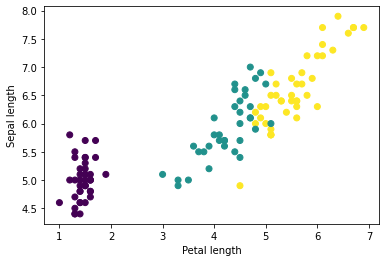

Model: "iris_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [7]:
# %%
## Use matplotlib to visualize the dataset we get.
plt.scatter(features_df['petal_length'],
    features_df['sepal_length'],
    c=label_df,
    cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

test_df = pd.read_csv(test_dataset_fp,skiprows=1,names=column_names)
features_df = test_df[feature_names]
label_df = test_df[label_name]

test_dataset = tf.data.Dataset.from_tensor_slices((features_df,label_df)).batch(batch_size)

inputs = keras.Input(shape=(4,))
h1 = keras.layers.Dense(10,activation=tf.nn.relu)(inputs)
h2 = keras.layers.Dense(10,activation=tf.nn.relu)(h1)
outputs = keras.layers.Dense(3)(h2)
model = keras.Model(inputs=inputs, outputs=outputs, name="iris_model")

model.summary()

In [8]:
# %%
## Makes predictions based on untrained weights and bias
next_batch_dataset = next(iter(train_dataset))
features,labels = next_batch_dataset
predictions = model(features)
predictions[:5]

## Use softmax to convert the number to probabilities
tf.nn.softmax(predictions[:5])



<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.04026053, 0.92918277, 0.03055671],
       [0.17734982, 0.7327526 , 0.08989754],
       [0.06769077, 0.8837953 , 0.04851385],
       [0.29698184, 0.6178415 , 0.08517668],
       [0.2826322 , 0.6487511 , 0.06861676]], dtype=float32)>

In [9]:
## Showing prediction results.
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))



Prediction: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
    Labels: [2 1 2 0 0 0 0 2 1 0 1 1 0 0 2 1 2 2 2 0 2 2 0 2 2 0 1 2 1 1 1 1]


In [10]:
# %%
## Define loss(The difference between the predictions made and the true value) as Sparse Categorical Cross Entropy
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [11]:
# %%
## Define loss function
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.8176872730255127


In [12]:
# %%
## gradient descents for the models with the input and targets
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

## Set optimizers to be Stochastic Gradient Descent
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [13]:
# %%
## Single step for training
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {}, Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.8176872730255127
Step: 1, Loss: 1.518784761428833


In [14]:
# %%
## Training Loop for multiple optimization steps
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,epoch_loss_avg.result(), epoch_accuracy.result()))

Epoch 000: Loss: 1.323, Accuracy: 30.000%
Epoch 050: Loss: 0.404, Accuracy: 87.500%
Epoch 100: Loss: 0.263, Accuracy: 97.500%
Epoch 150: Loss: 0.186, Accuracy: 97.500%
Epoch 200: Loss: 0.149, Accuracy: 97.500%


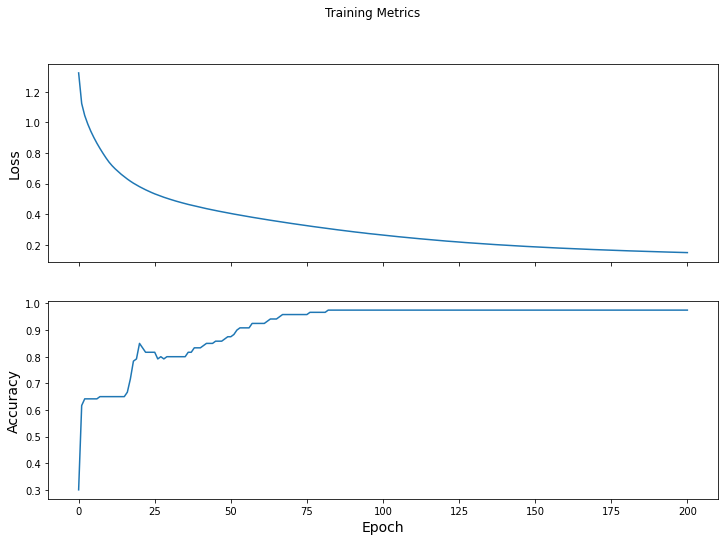

In [15]:
# %%
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [16]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Test set accuracy: 96.667%


In [17]:
model.save('./model',overwrite=True)

INFO:tensorflow:Assets written to: ./model/assets


In [18]:
# %%
## loading test dataset
# test_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
test_dataset_url = "/Users/veperho/Desktop/gitlab-repo/tecky-exercise/Self_exercise/Tecky-BAD-exercise/BAD006-009_Python_and_AI/BAD008_AI_Tensorflow/iris_test.csv"

test_dataset_fp = tf.keras.utils.get_file(fname=test_dataset_url,
                origin=test_dataset_url)
print("Local copy of the test dataset file: {}".format(test_dataset_fp))

Local copy of the test dataset file: /Users/veperho/Desktop/gitlab-repo/tecky-exercise/Self_exercise/Tecky-BAD-exercise/BAD006-009_Python_and_AI/BAD008_AI_Tensorflow/iris_test.csv


In [19]:
# %%
## columns name of the train_dataset
feature_names = ['sepal_length','sepal_width',
        'petal_length','petal_width']

label_name = 'species'
column_names = feature_names + [label_name]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

feature_names = ['sepal_length','sepal_width',
        'petal_length','petal_width']

label_name = 'species'
column_names = feature_names + [label_name]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [20]:
# %%
## Reading the datasets from the csv
batch_size = 32

train_df = pd.read_csv(train_dataset_fp,skiprows=1,names=column_names)
features_df = train_df[feature_names]
label_df = train_df[label_name]

# Set the train dataset to have a batch size of 32
train_dataset = tf.data.Dataset.from_tensor_slices((features_df,label_df)).batch(batch_size)


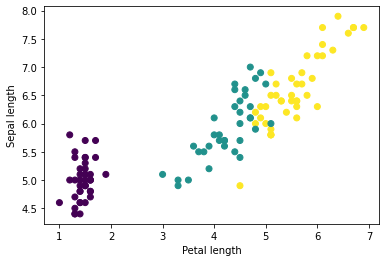

Model: "iris_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [21]:
# %%
## Use matplotlib to visualize the dataset we get.
plt.scatter(features_df['petal_length'],
    features_df['sepal_length'],
    c=label_df,
    cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

test_df = pd.read_csv(test_dataset_fp,skiprows=1,names=column_names)
features_df = test_df[feature_names]
label_df = test_df[label_name]

test_dataset = tf.data.Dataset.from_tensor_slices((features_df,label_df)).batch(batch_size)

inputs = keras.Input(shape=(4,))
h1 = keras.layers.Dense(10,activation=tf.nn.relu)(inputs)
h2 = keras.layers.Dense(10,activation=tf.nn.relu)(h1)
outputs = keras.layers.Dense(3)(h2)
model = keras.Model(inputs=inputs, outputs=outputs, name="iris_model")

model.summary()

In [22]:
# %%
## Makes predictions based on untrained weights and bias
next_batch_dataset = next(iter(train_dataset))
features,labels = next_batch_dataset
predictions = model(features)
predictions[:5]

## Use softmax to convert the number to probabilities
tf.nn.softmax(predictions[:5])



<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.39872417, 0.00146785, 0.599808  ],
       [0.40127656, 0.00593281, 0.5927906 ],
       [0.4156176 , 0.00548765, 0.5788948 ],
       [0.46703312, 0.01172688, 0.52124   ],
       [0.49049458, 0.00686285, 0.5026426 ]], dtype=float32)>

In [23]:
## Showing prediction results.
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))



Prediction: [2 2 2 2 2 0 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2]
    Labels: [2 1 2 0 0 0 0 2 1 0 1 1 0 0 2 1 2 2 2 0 2 2 0 2 2 0 1 2 1 1 1 1]


In [24]:
# %%
## Define loss(The difference between the predictions made and the true value) as Sparse Categorical Cross Entropy
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [25]:
# %%
## Define loss function
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 2.2735230922698975


In [26]:
# %%
## gradient descents for the models with the input and targets
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

## Set optimizers to be Stochastic Gradient Descent
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [27]:
# %%
## Single step for training
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {}, Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 2.2735230922698975
Step: 1, Loss: 1.9670741558074951


In [28]:
# %%
## Training Loop for multiple optimization steps
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,epoch_loss_avg.result(), epoch_accuracy.result()))

Epoch 000: Loss: 1.617, Accuracy: 65.000%
Epoch 050: Loss: 0.400, Accuracy: 89.167%
Epoch 100: Loss: 0.274, Accuracy: 96.667%
Epoch 150: Loss: 0.210, Accuracy: 96.667%
Epoch 200: Loss: 0.171, Accuracy: 96.667%


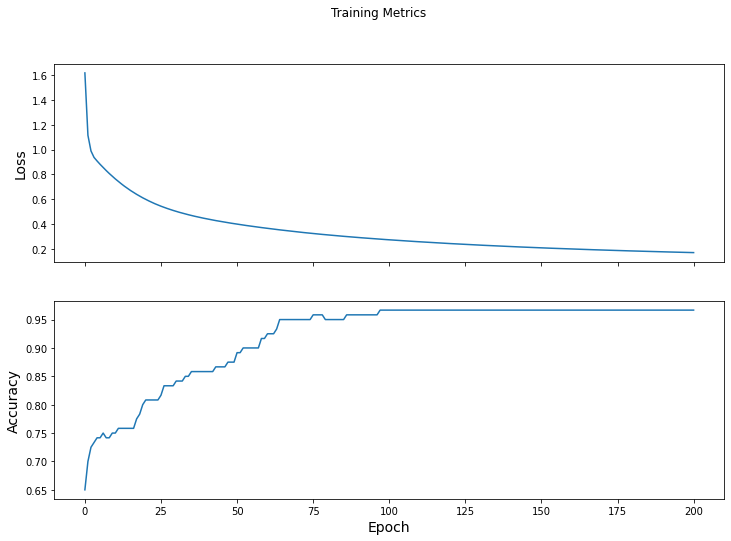

In [29]:
# %%
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [30]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Test set accuracy: 96.667%


In [31]:
model.save('./model',overwrite=True)

INFO:tensorflow:Assets written to: ./model/assets


In [32]:
# %%
## loading test dataset
# test_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
test_dataset_url = "/Users/veperho/Desktop/gitlab-repo/tecky-exercise/Self_exercise/Tecky-BAD-exercise/BAD006-009_Python_and_AI/BAD008_AI_Tensorflow/iris_test.csv"

test_dataset_fp = tf.keras.utils.get_file(fname=test_dataset_url,
                origin=test_dataset_url)
print("Local copy of the test dataset file: {}".format(test_dataset_fp))

Local copy of the test dataset file: /Users/veperho/Desktop/gitlab-repo/tecky-exercise/Self_exercise/Tecky-BAD-exercise/BAD006-009_Python_and_AI/BAD008_AI_Tensorflow/iris_test.csv


In [33]:
# %%
## columns name of the train_dataset
feature_names = ['sepal_length','sepal_width',
        'petal_length','petal_width']

label_name = 'species'
column_names = feature_names + [label_name]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

feature_names = ['sepal_length','sepal_width',
        'petal_length','petal_width']

label_name = 'species'
column_names = feature_names + [label_name]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [34]:
# %%
## Reading the datasets from the csv
batch_size = 32

train_df = pd.read_csv(train_dataset_fp,skiprows=1,names=column_names)
features_df = train_df[feature_names]
label_df = train_df[label_name]

# Set the train dataset to have a batch size of 32
train_dataset = tf.data.Dataset.from_tensor_slices((features_df,label_df)).batch(batch_size)


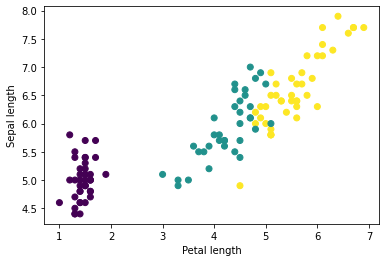

Model: "iris_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 10)                50        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [35]:
# %%
## Use matplotlib to visualize the dataset we get.
plt.scatter(features_df['petal_length'],
    features_df['sepal_length'],
    c=label_df,
    cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

test_df = pd.read_csv(test_dataset_fp,skiprows=1,names=column_names)
features_df = test_df[feature_names]
label_df = test_df[label_name]

test_dataset = tf.data.Dataset.from_tensor_slices((features_df,label_df)).batch(batch_size)

inputs = keras.Input(shape=(4,))
h1 = keras.layers.Dense(10,activation=tf.nn.relu)(inputs)
h2 = keras.layers.Dense(10,activation=tf.nn.relu)(h1)
outputs = keras.layers.Dense(3)(h2)
model = keras.Model(inputs=inputs, outputs=outputs, name="iris_model")

model.summary()

In [36]:
# %%
## Makes predictions based on untrained weights and bias
next_batch_dataset = next(iter(train_dataset))
features,labels = next_batch_dataset
predictions = model(features)
predictions[:5]

## Use softmax to convert the number to probabilities
tf.nn.softmax(predictions[:5])



<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.7506166 , 0.05263395, 0.19674946],
       [0.66957605, 0.08305048, 0.24737346],
       [0.68039966, 0.0927489 , 0.22685137],
       [0.7269753 , 0.09182093, 0.18120375],
       [0.7606181 , 0.07794032, 0.16144164]], dtype=float32)>

In [37]:
## Showing prediction results.
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))



Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [2 1 2 0 0 0 0 2 1 0 1 1 0 0 2 1 2 2 2 0 2 2 0 2 2 0 1 2 1 1 1 1]


In [38]:
# %%
## Define loss(The difference between the predictions made and the true value) as Sparse Categorical Cross Entropy
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [39]:
# %%
## Define loss function
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.6059924364089966


In [40]:
# %%
## gradient descents for the models with the input and targets
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

## Set optimizers to be Stochastic Gradient Descent
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [41]:
# %%
## Single step for training
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {}, Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.6059924364089966
Step: 1, Loss: 1.4348686933517456


In [42]:
# %%
## Training Loop for multiple optimization steps
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,epoch_loss_avg.result(), epoch_accuracy.result()))

Epoch 000: Loss: 1.306, Accuracy: 41.667%
Epoch 050: Loss: 0.635, Accuracy: 70.000%
Epoch 100: Loss: 0.336, Accuracy: 98.333%
Epoch 150: Loss: 0.223, Accuracy: 99.167%
Epoch 200: Loss: 0.166, Accuracy: 99.167%


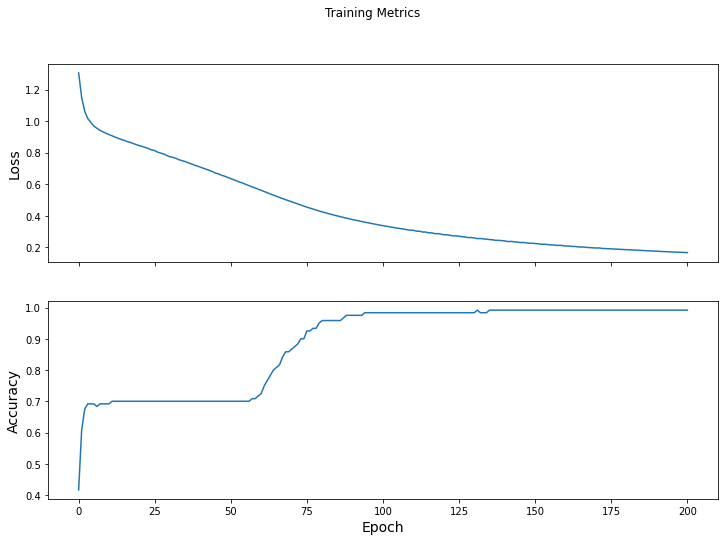

In [43]:
# %%
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [44]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Test set accuracy: 96.667%


In [45]:
model.save('./model',overwrite=True)

INFO:tensorflow:Assets written to: ./model/assets
